In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression

In [8]:
box_office_data = pd.read_csv(r"C:\Users\hp\Desktop\大学\2025winter\math189proj-main\2000-2009 Movies Box Ofice Collection.csv")
imdb_data_1 = pd.read_csv(r"C:\Users\hp\Desktop\大学\2025winter\math189proj-main\imdb_movies.csv")
imdb_data_2 = pd.read_csv(r"C:\Users\hp\Desktop\大学\2025winter\math189proj-main\IMDB_Movies_Dataset.csv")

In [9]:
box_office_data['total_income'] = pd.to_numeric(box_office_data['Worldwide'].str.replace(',', ''), errors='coerce') if 'Worldwide' in box_office_data.columns else None
imdb_data_1['total_investment'] = pd.to_numeric(imdb_data_1['budget_x'], errors='coerce') if 'budget_x' in imdb_data_1.columns else None

merged_data = pd.merge(box_office_data, imdb_data_1, left_on='Release Group', right_on='names', how='outer')
merged_data = pd.merge(merged_data, imdb_data_2, left_on='Release Group', right_on='Title', how='outer')

In [ ]:
if 'genre' in merged_data.columns:
    merged_data.rename(columns={'genre': 'genre_list'}, inplace=True)

merged_data['genre_list'] = merged_data['genre_list'].astype(str).str.split(',')
merged_data = merged_data.explode('genre_list')
merged_data['genre_list'] = merged_data['genre_list'].str.strip()

#delete
merged_data = merged_data.dropna(subset=['total_income', 'total_investment', 'genre_list'])


In [11]:
correlation = merged_data.groupby('genre_list')[['total_income', 'total_investment']].corr().iloc[0::2, -1]
print("Correlation of income & investment:")
print(correlation)

Correlation of income & investment:
genre_list                   
Action           total_income    0.595279
Adventure        total_income    0.514599
Animation        total_income    0.384744
Comedy           total_income    0.516203
Crime            total_income    0.636290
Documentary      total_income    0.742159
Drama            total_income    0.505508
Family           total_income    0.555330
Fantasy          total_income    0.541335
History          total_income    0.755285
Horror           total_income    0.356135
Music            total_income    0.319147
Mystery          total_income    0.512385
Romance          total_income    0.371611
Science Fiction  total_income    0.628730
TV Movie         total_income    0.969566
Thriller         total_income    0.667187
War              total_income    0.619598
Western          total_income    0.851093
nan              total_income         NaN
Name: total_investment, dtype: float64


In [12]:
r_squared_results = {}

In [13]:
for genre in merged_data['genre_list'].unique():
    genre_data = merged_data[merged_data['genre_list'] == genre]
    
    X = genre_data['total_investment'].values.reshape(-1, 1)
    y = genre_data['total_income'].values

    if len(X) > 1: 
        model = LinearRegression()
        model.fit(X, y)
        r_squared = model.score(X, y)
        r_squared_results[genre] = r_squared

In [14]:
print("Coefficient of determination R²:")
for genre, r_sq in r_squared_results.items():
    print(f"{genre}: {r_sq:.4f}")

Coefficient of determination R²:
Adventure: 0.2648
Action: 0.3544
Drama: 0.2555
Fantasy: 0.2930
Family: 0.3084
Comedy: 0.2665
Romance: 0.1381
Horror: 0.1268
Mystery: 0.2625
Crime: 0.4049
Thriller: 0.4451
Science Fiction: 0.3953
War: 0.3839
Western: 0.7244
Music: 0.1019
Animation: 0.1480
TV Movie: 0.9401
History: 0.5705
Documentary: 0.5508


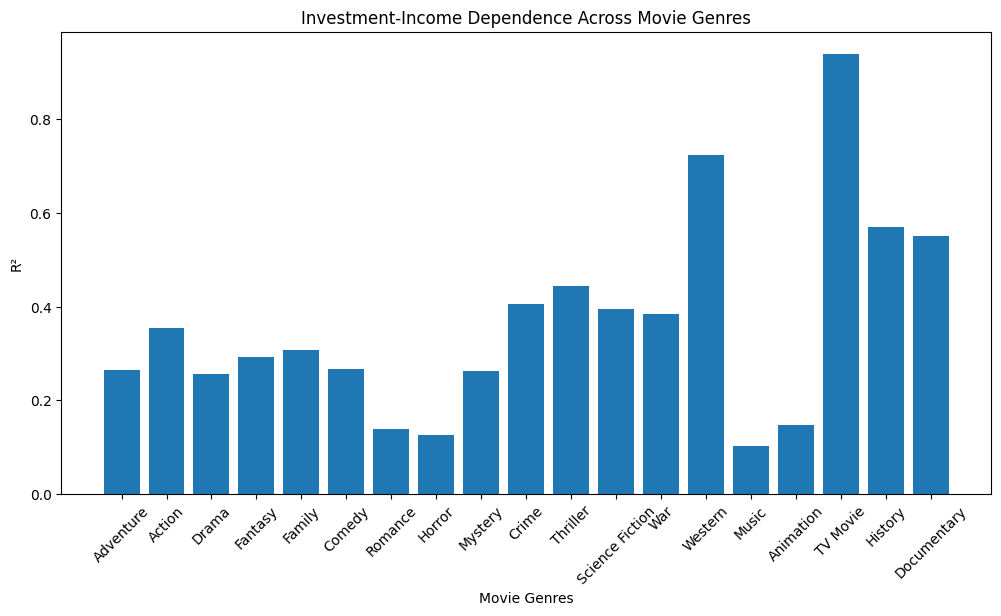

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(r_squared_results.keys(), r_squared_results.values())
plt.xlabel("Movie Genres")
plt.ylabel("R²")
plt.title("Investment-Income Dependence Across Movie Genres")
plt.xticks(rotation=45)
plt.show()